<a href="https://colab.research.google.com/github/CoolJunho/board/blob/master/EVKMC_log_analysis_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

In [ ]:
# @title Load log data
from google.colab import drive
drive.mount('/content/drive')
log_df = pd.read_csv('/content/drive/Shareddrives/SCS_SW/EVKMC/log/GL840_10B157_2024-06-04_15-43-45.csv', skiprows=43)
log_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NO.,Time,ms,degC,degC.1,degC.2,degC.3,degC.4,degC.5,degC.6,...,degC.13,degC.14,degC.15,degC.16,degC.17,degC.18,degC.19,A1234567890,A1234567890.1,A123456789
0,1,2024-06-04 15:43:47,0,56.3,33.7,33.0,10.7,30.7,32.3,26.8,...,26.4,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
1,2,2024-06-04 15:43:47,200,56.3,33.7,33.0,10.7,30.8,32.3,26.8,...,26.4,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
2,3,2024-06-04 15:43:47,400,56.3,33.8,33.0,10.8,30.8,32.3,26.8,...,26.4,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
3,4,2024-06-04 15:43:47,600,56.3,33.7,33.0,10.8,30.7,32.3,26.8,...,26.4,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
4,5,2024-06-04 15:43:47,800,56.3,33.8,33.1,10.8,30.8,32.3,26.8,...,26.4,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,9654,2024-06-04 16:15:57,600,51.3,34.4,33.3,11.4,33.0,34.7,30.6,...,29.7,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
9654,9655,2024-06-04 16:15:57,800,51.3,34.4,33.3,11.4,33.0,34.7,30.6,...,29.9,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
9655,9656,2024-06-04 16:15:58,0,51.3,34.4,33.3,11.4,33.1,34.7,30.6,...,29.8,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL
9656,9657,2024-06-04 16:15:58,200,51.3,34.4,33.3,11.4,33.0,34.7,30.6,...,29.8,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,BURNOUT,LLLLLLLLLL,LLLLLLLLLL,LLLLLLLLLLLLLL


In [ ]:
# drop the first row
log = log_df.drop(columns=['degC.14','degC.15','degC.16','degC.17','degC.18','degC.19','A1234567890','A1234567890.1','A123456789']).drop(934) # drop row with VentRight = '-------'
# log = log_df.drop(0).drop(columns=['CH15','CH16','CH17','CH18','CH19','CH20','Alarm1','Alarm2','AlarmOut'])
log.columns = ['No','Time','ms','PT1','PT2','PT3','PT4','T4','InverterOut','BatteryBack','BatteryFront','OBCOut','RadiatorOut','VentRight','VentMid','VentLeft','OutTemp']
log.VentRight = pd.to_numeric(log.VentRight)
log

,No,Time,ms,PT1,PT2,PT3,PT4,T4,InverterOut,BatteryBack,BatteryFront,OBCOut,RadiatorOut,VentRight,VentMid,VentLeft,OutTemp
0,1,2024-06-04 15:43:47,0,56.3,33.7,33.0,10.7,30.7,32.3,26.8,27.9,26.9,28.6,9.4,20.5,9.9,26.4
1,2,2024-06-04 15:43:47,200,56.3,33.7,33.0,10.7,30.8,32.3,26.8,27.9,26.9,28.6,9.4,20.6,10.0,26.4
2,3,2024-06-04 15:43:47,400,56.3,33.8,33.0,10.8,30.8,32.3,26.8,27.9,26.9,28.6,9.4,20.6,10.0,26.4
3,4,2024-06-04 15:43:47,600,56.3,33.7,33.0,10.8,30.7,32.3,26.8,27.9,26.9,28.6,9.5,20.7,10.0,26.4
4,5,2024-06-04 15:43:47,800,56.3,33.8,33.1,10.8,30.8,32.3,26.8,27.9,26.9,28.7,9.4,20.7,10.0,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,9654,2024-06-04 16:15:57,600,51.3,34.4,33.3,11.4,33.0,34.7,30.6,31.7,32.4,33.3,11.4,19.2,11.4,29.7
9654,9655,2024-06-04 16:15:57,800,51.3,34.4,33.3,11.4,33.0,34.7,30.6,31.6,32.5,33.3,11.4,19.2,11.4,29.9
9655,9656,2024-06-04 16:15:58,0,51.3,34.4,33.3,11.4,33.1,34.7,30.6,31.7,32.5,33.3,11.5,19.2,11.4,29.8
9656,9657,2024-06-04 16:15:58,200,51.3,34.4,33.3,11.4,33.0,34.7,30.6,31.7,32.4,33.3,11.4,19.2,11.4,29.8


In [ ]:
log.VentRight.iloc[933:936] # check if really dropped

933    24.4
935    24.5
936    24.6
Name: VentRight, dtype: float64

<Axes: xlabel='Time'>

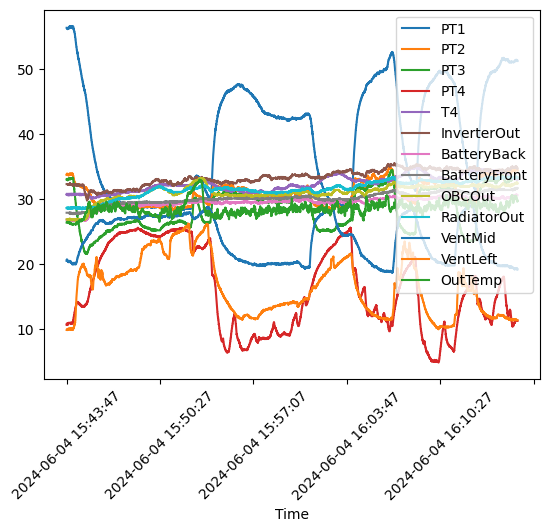

In [ ]:
log.plot(x='Time', y=['PT1','PT2','PT3','PT4','T4','InverterOut','BatteryBack','BatteryFront','OBCOut','RadiatorOut','VentRight','VentMid','VentLeft','OutTemp'], rot=45)

In [ ]:
#@title Split data
# 오후 3:54 , 80km/h, 1단
# 오후 4:00 , 환기
d1 = log[3065:4865]
print(d1)

# 4:04, 80km/h, 3단
# 4:06 환기
d2 = log[6065:6665]
print(d2)

# 4:08, 60km/h, 1단
# 4:11, 환기
d3 = log[7265:8165]
print(d3)

# 4:12, 60km/h, 3단
# 4:16, 환기
d4 = log[8465:9658]
print(d4)

        No                 Time   ms   PT1   PT2   PT3   PT4    T4  \
3066  3067  2024-06-04 15:54:00  200  30.2  29.2  26.5  23.9  32.5   
3067  3068  2024-06-04 15:54:00  400  30.2  29.2  26.5  23.9  32.5   
3068  3069  2024-06-04 15:54:00  600  30.2  29.2  26.4  23.9  32.5   
3069  3070  2024-06-04 15:54:00  800  30.2  29.2  26.4  23.9  32.5   
3070  3071  2024-06-04 15:54:01    0  30.2  29.2  26.5  23.9  32.5   
...    ...                  ...  ...   ...   ...   ...   ...   ...   
4861  4862  2024-06-04 15:59:59  200  42.4  31.0  29.8  11.4  32.1   
4862  4863  2024-06-04 15:59:59  400  42.4  31.0  30.0  11.5  32.1   
4863  4864  2024-06-04 15:59:59  600  42.4  31.0  29.9  11.5  32.1   
4864  4865  2024-06-04 15:59:59  800  42.4  31.0  30.0  11.5  32.1   
4865  4866  2024-06-04 16:00:00    0  42.4  31.0  30.0  11.5  32.1   

      InverterOut  BatteryBack  BatteryFront  OBCOut  RadiatorOut  VentRight  \
3066         33.1         29.7          30.0    31.4         31.4       23.9   

In [ ]:
#@title Plot data
fig = px.line(d1, x="Time", y=['PT1','PT2','PT3','PT4','T4','InverterOut','BatteryBack','BatteryFront','OBCOut','RadiatorOut','VentRight','VentMid','VentLeft','OutTemp'], title="80km/h, 1단")
fig.show()
fig = px.line(d2, x="Time", y=['PT1','PT2','PT3','PT4','T4','InverterOut','BatteryBack','BatteryFront','OBCOut','RadiatorOut','VentRight','VentMid','VentLeft','OutTemp'], title="80km/h, 3단")
fig.show()
fig = px.line(d3, x="Time", y=['PT1','PT2','PT3','PT4','T4','InverterOut','BatteryBack','BatteryFront','OBCOut','RadiatorOut','VentRight','VentMid','VentLeft','OutTemp'], title="60km/h, 1단")
fig.show()
fig = px.line(d4, x="Time", y=['PT1','PT2','PT3','PT4','T4','InverterOut','BatteryBack','BatteryFront','OBCOut','RadiatorOut','VentRight','VentMid','VentLeft','OutTemp'], title="60km/h, 3단")
fig.show()